# Supply Chain Network Design

## Case Study: GRAVITY LOCATION MODELS

Introduction:

Steel Appliances(SA), a manufacturer of high-quality refrigerators and cooking ranges. SA has one assembly factory located near Denver, from which it has supplied the entire United States. Demand has grown rapidly and the CEO of SA has decided to set up another factory to serve its eastern markets. The supply chain manager is asked to find a suitable location for the new factory. Three parts plants located in Buffalo, Boston, Jacksonville, Philadelphia, and New York. The coordinate location, the demand in each market, the required supply from each parts plant, and the shipping cost for each supply source or market are shown in SA.Excel.

In [1]:
from IPython.display import Image
from pulp import * # Import PuLP modeler functions
import pandas as pd
import numpy as np
from scipy.optimize import minimize

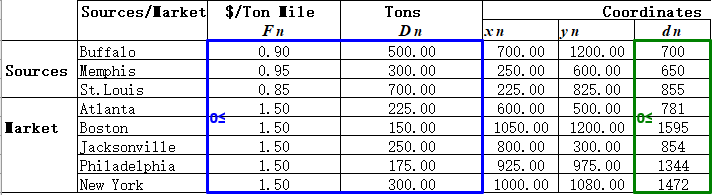

In [2]:
Image(filename='picture5.png',width=800,height=800)

Model Setup

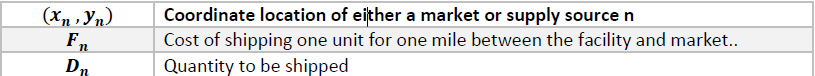

In [3]:
Image(filename='picture4.png',width=800,height=800)

Objective:

$\operatorname{Min} \mathrm{TC}=\sum_{n=1}^{k} d_{n} D_{n} F_{n}$
with distance: $d_{n}=\sqrt{\left(x-x_{n}\right)^{2}+\left(y-y_{n}\right)^{2}}$

### <font color=yellow>Method one: non-linear optimiztion in scipy.optimize</font>

In [4]:
def distance(z):
    x,y = z
    dist = 0
    xn = [700,250,225,600,1050,800,925,1000]
    yn = [1200,600,825,500,1200,300,975,1080]
    Fn = [0.9,0.95,0.85,1.5,1.5,1.5,1.5,1.5]
    Dn = [500,300,700,225,150,250,175,300]
    for i in range(len(xn)):
        fun = np.sqrt((xn[i] - x)**2 + (yn[i] - y)**2)*Fn[i]*Dn[i]
        dist += fun
    return dist
      

bnds = ((0, None), (0, None))
res = minimize(distance, (0, 0), method='BFGS', bounds=bnds)

res

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:522: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)


      fun: 1265235.3921309123
 hess_inv: array([[ 0.00617921, -0.00617226],
       [-0.00617226,  0.0074249 ]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 104
      nit: 12
     njev: 26
   status: 0
  success: True
        x: array([681.30167171, 881.99491536])

### <font color=yellow>Method Two: First order derivative rule</font>

In [66]:
def xy_update(x,y):
    xn = [700,250,225,600,1050,800,925,1000]
    yn = [1200,600,825,500,1200,300,975,1080]
    Fn = [0.9,0.95,0.85,1.5,1.5,1.5,1.5,1.5]
    Dn = [500,300,700,225,150,250,175,300]
    x_denom = 0
    y_denom = 0
    numerat = 0
    for i in range(len(xn)):
        dn = np.sqrt((xn[i] - x)**2 + (yn[i] - y)**2)
        x_denom += Dn[i]*Fn[i]*xn[i]/dn
        y_denom += Dn[i]*Fn[i]*yn[i]/dn
        numerat += Dn[i]*Fn[i]/dn
    x_new = x_denom/numerat
    y_new = y_denom/numerat
    error = (x_new - x)**2 + (y_new - y)**2
    return x_new, y_new, error

In [67]:
x=0.1
y=0.1
dn=100
while dn > 0.001:
    x_old = x
    y_old = y
    x,y,dn = xy_update(x_old,y_old)

In [68]:
x,y,dn

(681.2508976492496, 881.9446358471249, 0.0008254746117231011)

### <font color=yellow>Data Visualization</font>

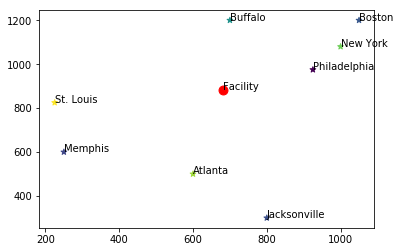

In [75]:
from numpy import *;
import matplotlib.pyplot as plt
xn = [700,250,225,600,1050,800,925,1000]
yn = [1200,600,825,500,1200,300,975,1080] 

colors = np.random.rand(len(xn)) # 随机产生50个0~1之间的颜色值
area = np.pi * (15 * np.random.rand(N))**2  # 点的半径范围:0~15 
txt = ['Buffalo','Memphis','St. Louis','Atlanta','Boston','Jacksonville',
       'Philadelphia','New York']
# 画散点图
fig,ax=plt.subplots()
ax.scatter(xn, yn, c=colors, marker='*')
ax.scatter(x, y, c='red',s = 80)
ax.annotate('Facility',(x,y))
for i in range(len(xn)):
    ax.annotate(txt[i],(xn[i],yn[i]))